In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive



Files in 'Alternaria' folder:
['Alternaria158.jpg', 'Alternaria82.jpg', 'Alternaria170.jpg', 'Alternaria83.jpg', 'Alternaria41.jpg', 'Alternaria171.jpg', 'Alternaria5.jpg', 'Alternaria159.jpg', 'Alternaria55.jpg', 'Alternaria165.jpg', 'Alternaria96.jpg', 'Alternaria68.jpg', 'Alternaria69.jpg', 'Alternaria164.jpg', 'Alternaria40.jpg', 'Alternaria4.jpg', 'Alternaria54.jpg', 'Alternaria7.jpg', 'Alternaria46.jpg', 'Alternaria188.jpg', 'Alternaria53.jpg', 'Alternaria189.jpg', 'Alternaria43.jpg', 'Alternaria174.jpg', 'Alternaria86.jpg', 'Alternaria90.jpg', 'Alternaria175.jpg', 'Alternaria94.jpg', 'Alternaria79.jpg', 'Alternaria6.jpg', 'Alternaria87.jpg', 'Alternaria163.jpg', 'Alternaria160.jpg', 'Alternaria172.jpg', 'Alternaria166.jpg', 'Alternaria162.jpg', 'Alternaria3.jpg', 'Alternaria97.jpg', 'Alternaria47.jpg', 'Alternaria91.jpg', 'Alternaria78.jpg', 'Alternaria1.jpg', 'Alternaria92.jpg', 'Alternaria2.jpg', 'Alternaria85.jpg', 'Alternaria167.jpg', 'Alternaria84.jpg', 'Alternaria45.jpg',

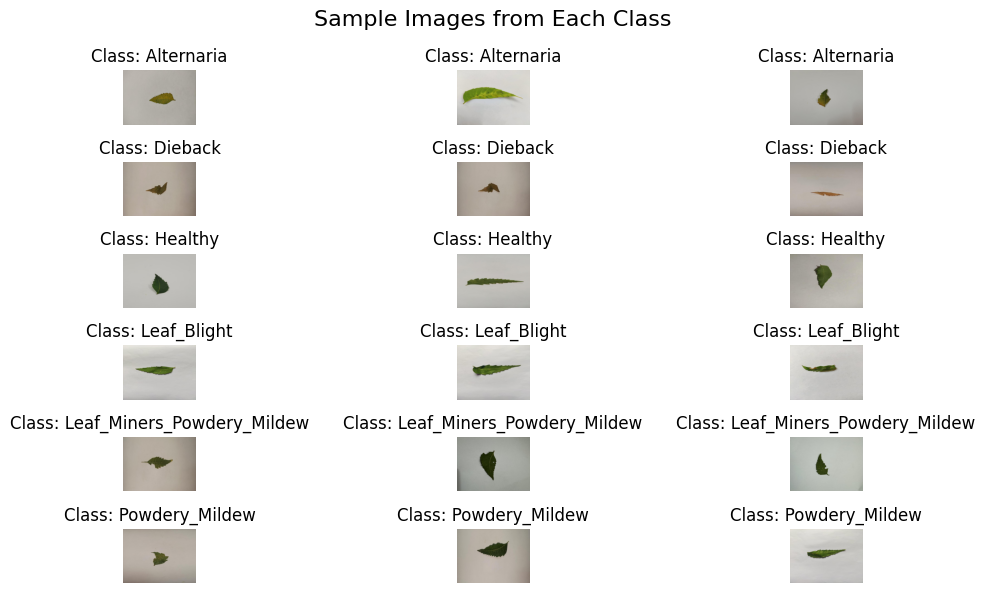

In [2]:
import os
import matplotlib.pyplot as plt

# Define paths to each class
base_dir = '/content/drive/MyDrive/neem_dataset'
class_dirs = {
    'Alternaria': os.path.join(base_dir, 'Alternaria'),
    'Dieback': os.path.join(base_dir, 'Dieback'),
    'Healthy': os.path.join(base_dir, 'Healthy'),
    'Leaf_Blight': os.path.join(base_dir, 'Leaf_Blight'),
    'Leaf_Miners_Powdery_Mildew': os.path.join(base_dir, 'Leaf_Miners_Powdery_Mildew'),
    'Powdery_Mildew': os.path.join(base_dir, 'Powdery_Mildew')
}

# Define allowed image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

# Count the number of images in each class, filtering by image extensions and ensuring they are not subdirectories
for class_name, path in class_dirs.items():
    # List all files in the directory
    all_files = os.listdir(path)

    # Print the list of files for inspection
    print(f"\nFiles in '{class_name}' folder:")
    print(all_files)

    # Filter only image files by extension
    image_files = [file for file in all_files if file.lower().endswith(image_extensions)]

    # Count and print the number of images
    num_images = len(image_files)
    print(f"Class '{class_name}' has {num_images} images.")

# Display a few images from each class
def display_sample_images(class_dirs, num_images=3):
    """Display sample images from each class."""
    fig, axes = plt.subplots(len(class_dirs), num_images, figsize=(12, 6))
    fig.suptitle("Sample Images from Each Class", fontsize=16)

    for i, (class_name, path) in enumerate(class_dirs.items()):
        images = os.listdir(path)[:num_images]
        for j, img_name in enumerate(images):
            img = plt.imread(os.path.join(path, img_name))
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"Class: {class_name}")
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Display images
display_sample_images(class_dirs)


In [3]:
import os

# Define the path to the extracted dataset
data_path = '/content/drive/MyDrive/neem_dataset'

# Set up paths to each class
class_names = ['Alternaria', 'Dieback', 'Healthy','Leaf_Blight','Leaf_Miners_Powdery_Mildew','Powdery_Mildew']
class_paths = {class_name: os.path.join(data_path, class_name) for class_name in class_names}

# Count the number of images in each class
image_counts = {class_name: len(os.listdir(class_path)) for class_name, class_path in class_paths.items()}

# Print the counts of images in each class
for class_name, count in image_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'Alternaria' has 565 images.
Class 'Dieback' has 565 images.
Class 'Healthy' has 565 images.
Class 'Leaf_Blight' has 565 images.
Class 'Leaf_Miners_Powdery_Mildew' has 565 images.
Class 'Powdery_Mildew' has 565 images.


In [4]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Target number of images per class
target_count = 565 # You can adjust this as needed
target_size = (224, 224)


# Augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment images for each class until they reach the target count
for class_name, class_path in class_paths.items():
    current_count = image_counts[class_name]
    # Initialize the progress bar
    with tqdm(total=target_count - current_count, desc=f"Augmenting {class_name}", unit="img") as pbar:
        while current_count < target_count:
            # Randomly choose an image from the class to augment
            img_file = random.choice(os.listdir(class_path))
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, target_size)
                img = np.expand_dims(img, axis=0)  # Add batch dimension

                # Generate augmented images
                for batch in datagen.flow(img, batch_size=1, save_to_dir=class_path,
                                          save_prefix=f"{class_name}_aug", save_format="jpg"):
                    current_count += 1
                    pbar.update(1)  # Update progress bar for each augmentation
                    if current_count >= target_count:
                        break

print("Data augmentation complete. Each class should now have a similar number of images.")

# Re-count the number of images in each class
image_counts = {class_name: len(os.listdir(class_path)) for class_name, class_path in class_paths.items()}

# Print the counts of images in each class
for class_name, count in image_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Augmenting Alternaria: 0img [00:00, ?img/s]

Augmenting Dieback: 0img [00:00, ?img/s]

Augmenting Healthy: 0img [00:00, ?img/s]

Augmenting Leaf_Blight: 0img [00:00, ?img/s]

Augmenting Leaf_Miners_Powdery_Mildew: 0img [00:00, ?img/s]

Augmenting Powdery_Mildew: 0img [00:00, ?img/s]

Data augmentation complete. Each class should now have a similar number of images.
Class 'Alternaria' has 565 images.
Class 'Dieback' has 565 images.
Class 'Healthy' has 565 images.
Class 'Leaf_Blight' has 565 images.
Class 'Leaf_Miners_Powdery_Mildew' has 565 images.
Class 'Powdery_Mildew' has 565 images.


In [5]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import os
import random
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import os

# Define the target size for resizing
target_size = (224, 224)

# Function to load and preprocess images
def load_images(class_names, class_paths):
    images = []
    labels = []

    for class_name in class_names:
        class_path = class_paths[class_name]
        # Use tqdm to show a progress bar
        for image_file in tqdm(os.listdir(class_path), desc=f"Processing {class_name} images"):
            # Load the image
            img_path = os.path.join(class_path, image_file)
            img = cv2.imread(img_path)

            if img is not None:
                # Resize the image
                img = cv2.resize(img, target_size)
                # Normalize pixel values to [0, 1] and convert to float32
                img = img.astype(np.float32) / 255.0

                # Append the image and label
                images.append(img)
                labels.append(class_name)

    # Convert lists to numpy arrays
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels)

    return images, labels

# Load and preprocess images
images, labels = load_images(class_names, class_paths)

# Display the shape of the images and labels
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Processing Alternaria images:   0%|          | 0/565 [00:00<?, ?it/s]

Processing Dieback images:   0%|          | 0/565 [00:00<?, ?it/s]

Processing Healthy images:   0%|          | 0/565 [00:00<?, ?it/s]

Processing Leaf_Blight images:   0%|          | 0/565 [00:00<?, ?it/s]

Processing Leaf_Miners_Powdery_Mildew images:   0%|          | 0/565 [00:00<?, ?it/s]

Processing Powdery_Mildew images:   0%|          | 0/565 [00:00<?, ?it/s]

Images shape: (3390, 224, 224, 3)
Labels shape: (3390,)


In [6]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert to one-hot encoding
labels_one_hot = to_categorical(labels_encoded)

# Display the shape of the one-hot encoded labels
print("One-hot encoded labels shape:", labels_one_hot.shape)


One-hot encoded labels shape: (3390, 6)


In [7]:

# Split the dataset into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (2712, 224, 224, 3) (2712, 6)
Validation set shape: (339, 224, 224, 3) (339, 6)
Test set shape: (339, 224, 224, 3) (339, 6)


In [8]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define input layer
input_tensor = Input(shape=(224, 224, 3))

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

# Define the complete model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display the model summary
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,850,758 (90.98 MB)

 Trainable params: 263,046 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# Set training parameters
epochs = 50 # You can adjust the number of epochs
batch_size = 16

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience= epochs + 1,          # number of epochs to wait for improvement
    restore_best_weights=True  # restores weights from the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],  # add the callback here
    verbose=1
)
model.save('/content/drive/MyDrive/densenet_model.h5')

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.2143 - loss: 1.8092 - val_accuracy: 0.4189 - val_loss: 1.5505
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3695 - loss: 1.4844 - val_accuracy: 0.3953 - val_loss: 1.4510
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.4686 - loss: 1.3712 - val_accuracy: 0.4277 - val_loss: 1.4706
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.5209 - loss: 1.2754 - val_accuracy: 0.5015 - val_loss: 1.3007
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.5531 - loss: 1.1996 - val_accuracy: 0.5221 - val_loss: 1.2471
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.5810 - loss: 1.1214 - val_accuracy: 0.5693 - val_loss: 1.2496
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.5663 - loss: 1.1178 - val_accuracy: 0.4956 - val_loss: 1.3141
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.5859 - loss: 1.0963 - val_a

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 389ms/step - accuracy: 0.7660 - loss: 0.7170
Test Accuracy: 0.752212405204773


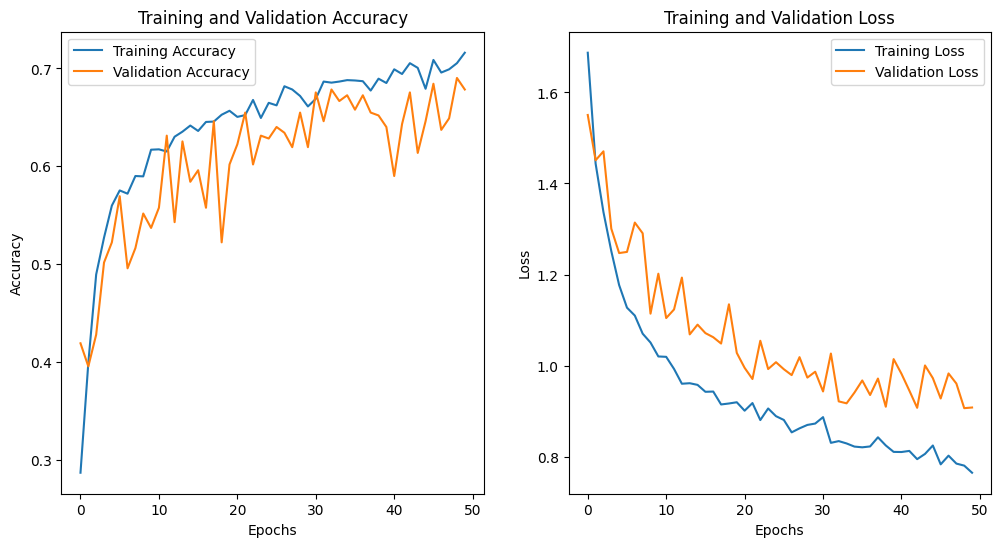

In [12]:
# Plot accuracy and loss graphs
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 445ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step

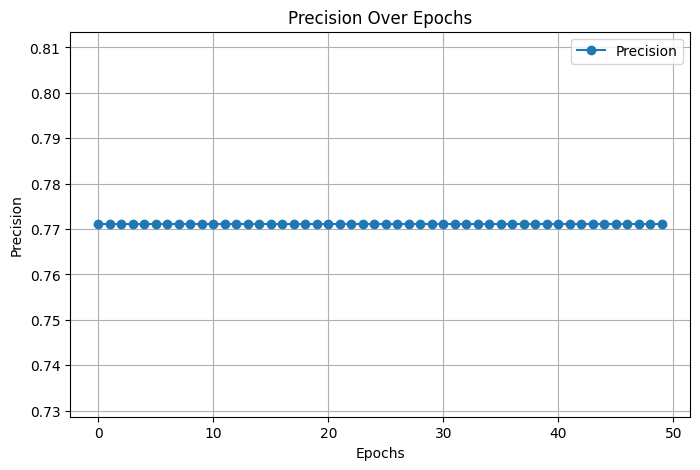

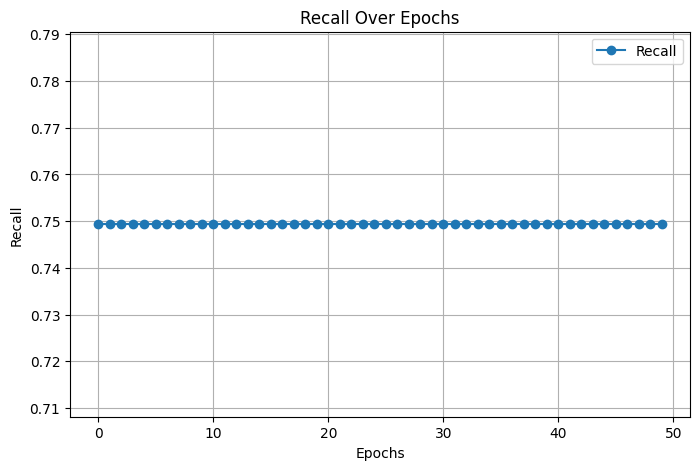

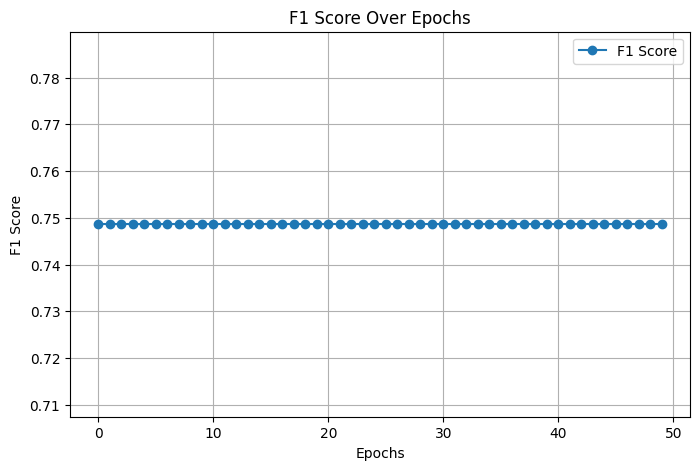

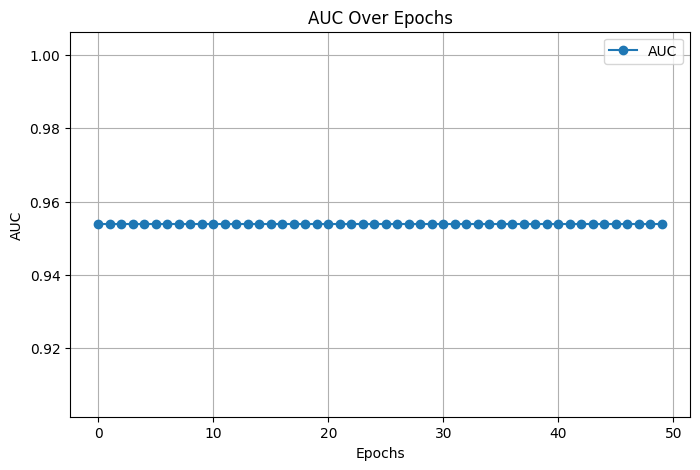

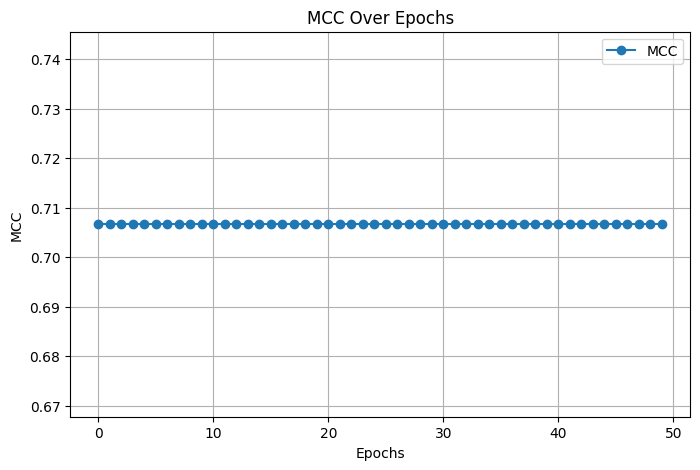

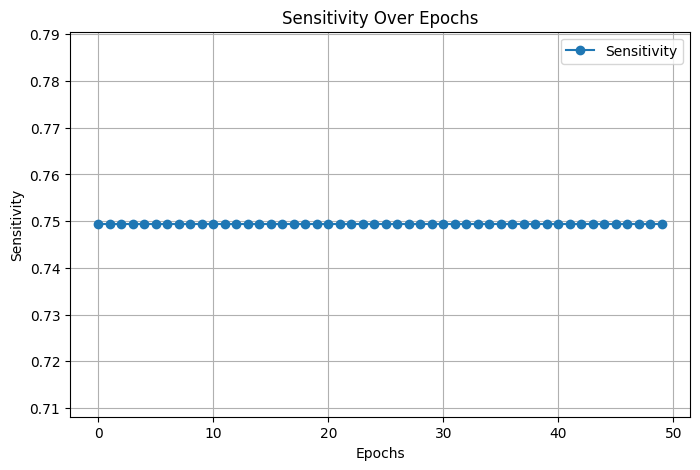

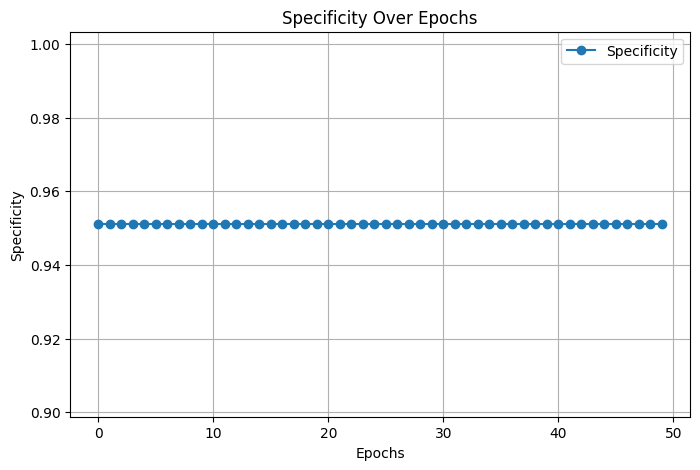

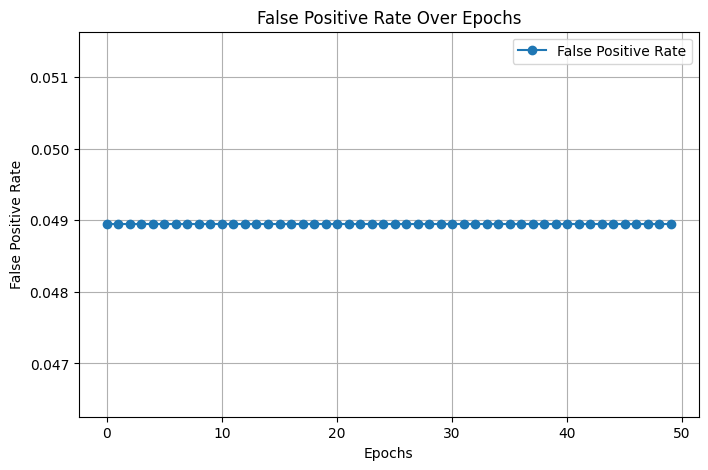

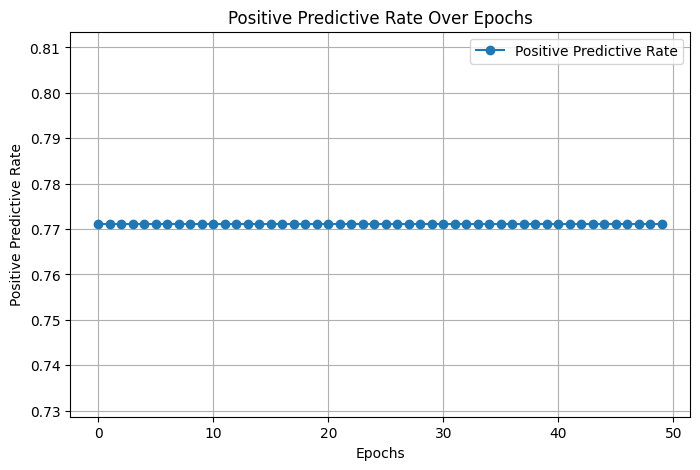


Final Evaluation Metrics:
Precision: 0.7711
Recall: 0.7493
F1 Score: 0.7486
AUC: 0.9538
MCC: 0.7067
Sensitivity: 0.7493
Specificity: 0.9511
False Positive Rate: 0.0489
Positive Predictive Rate: 0.7711


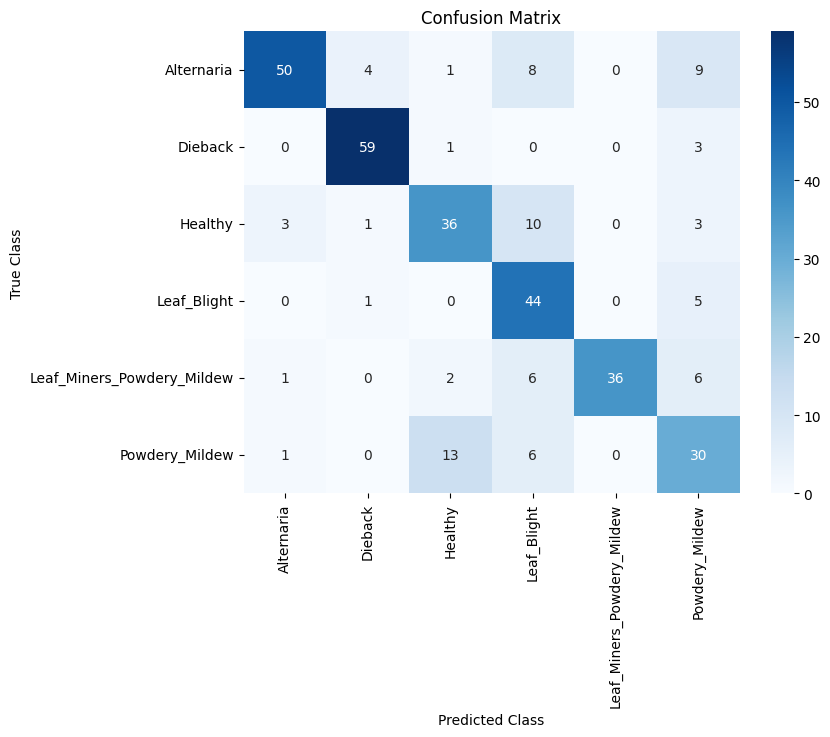

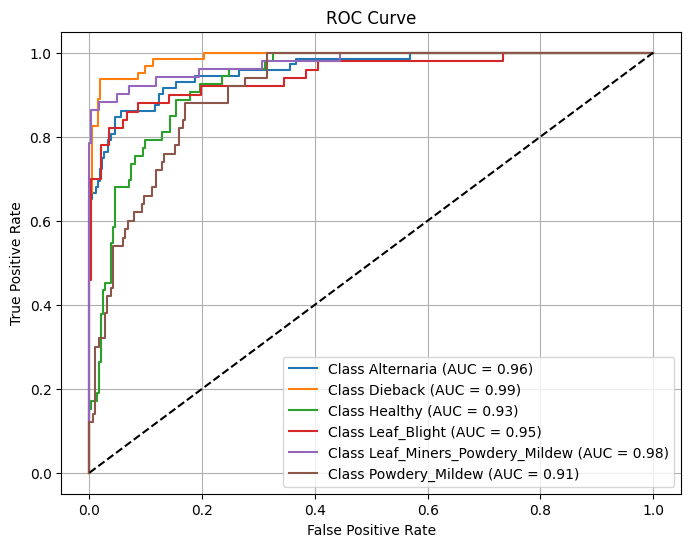

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Extract training history
epochs = range(len(history.history['accuracy']))

# Initialize lists to store evaluation metrics per epoch
precision_list, recall_list, f1_list, auc_list, mcc_list = [], [], [], [], []
sensitivity_list, specificity_list, fpr_list, ppr_list = [], [], [], []

# Compute evaluation metrics per epoch
for epoch in epochs:
    # Predict probabilities & classes for the current epoch
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Binarize y_test for ROC Curve
    y_test_binarized = label_binarize(y_true, classes=np.arange(len(class_names)))

    # Compute metrics
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    mcc = matthews_corrcoef(y_true, y_pred)

    try:
        auc_score = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')
    except ValueError:
        auc_score = np.nan  # Handle cases where AUC can't be computed

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute Sensitivity, Specificity, FPR, and PPR
    tp = np.diag(cm)
    fn = np.sum(cm, axis=1) - tp
    fp = np.sum(cm, axis=0) - tp
    tn = np.sum(cm) - (tp + fp + fn)

    sensitivity = np.mean(tp / (tp + fn + 1e-7))
    specificity = np.mean(tn / (tn + fp + 1e-7))
    fpr = np.mean(fp / (fp + tn + 1e-7))
    ppr = np.mean(tp / (tp + fp + 1e-7))

    # Append metrics for plotting
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc_score)
    mcc_list.append(mcc)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    fpr_list.append(fpr)
    ppr_list.append(ppr)

# Function to plot evaluation metrics over epochs
def plot_metric(epochs, values, metric_name):
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, values, marker='o', linestyle='-', label=metric_name)
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define metrics to plot
metrics = {
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'AUC': auc_list,
    'MCC': mcc_list,
    'Sensitivity': sensitivity_list,
    'Specificity': specificity_list,
    'False Positive Rate': fpr_list,
    'Positive Predictive Rate': ppr_list,
}

# Plot each metric over epochs
for metric_name, values in metrics.items():
    plot_metric(epochs, values, metric_name)

# Print final computed values
print("\nFinal Evaluation Metrics:")
for metric_name, values in metrics.items():
    print(f"{metric_name}: {values[-1]:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    if y_test_binarized.shape[1] > i and y_pred_proba.shape[1] > i:
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Confusion Matrix for Class Alternaria:
 [[267   0]
 [ 25  47]]


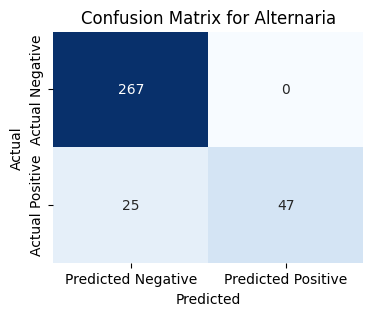

Confusion Matrix for Class Dieback:
 [[272   4]
 [  8  55]]


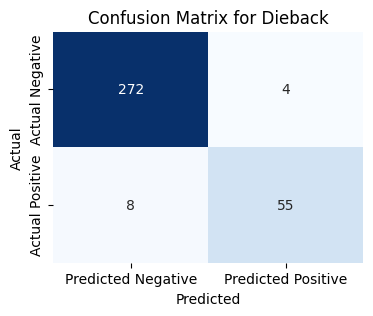

Confusion Matrix for Class Healthy:
 [[280   6]
 [ 36  17]]


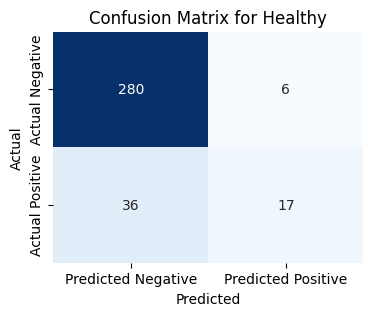

Confusion Matrix for Class Leaf_Blight:
 [[278  11]
 [  9  41]]


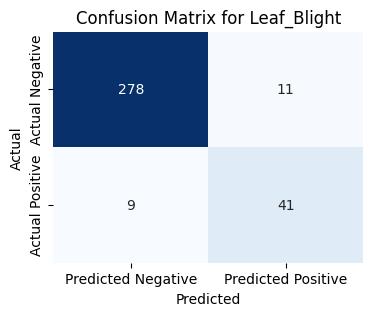

Confusion Matrix for Class Leaf_Miners:
 [[288   0]
 [ 16  35]]


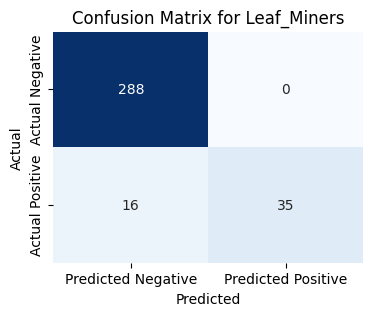

Confusion Matrix for Class Leaf_Miners_Powdery_Mildew:
 [[282   7]
 [ 34  16]]


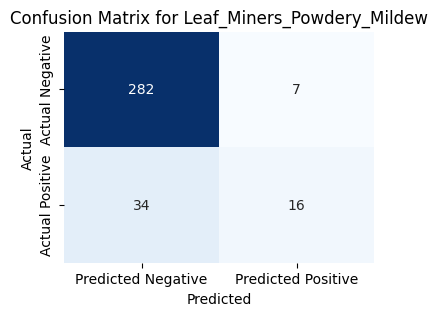


Precision:  0.8592412561646166
Recall:  0.6121371462631174
F1 Score:  0.6991924921807646
AUC:  0.9538117083601773
MCC:  0.6289890782941974


In [14]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assume you have class names (modify based on your specific case)
class_names = ['Alternaria', 'Dieback', 'Healthy','Leaf_Blight','Leaf_Miners','Leaf_Miners_Powdery_Mildew','Powdery_Mildew']

# Generate predictions
y_pred_proba = model.predict(X_test)  # Predict probabilities
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to class labels (binary)

# True labels
y_true = y_test

# Precision, Recall, F1 Score (for multilabel classification)
precision = precision_score(y_true, y_pred, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# AUC (Area Under the ROC Curve) for multilabel
auc = roc_auc_score(y_true, y_pred_proba, average='macro', multi_class='ovr')  # Adjusted for multilabel case

# MCC (Matthews Correlation Coefficient) for multilabel
mcc = matthews_corrcoef(y_true.argmax(axis=1), y_pred.argmax(axis=1))  # Taking the argmax if it's multilabel

# Calculate confusion matrix for each label separately
for i in range(y_true.shape[1]):
    cm = confusion_matrix(y_true[:, i], y_pred[:, i])  # Compute confusion matrix for each label
    print(f"Confusion Matrix for Class {class_names[i]}:\n", cm)

    # Plot the confusion matrix for each class
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {class_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print overall metrics
print("\nPrecision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("AUC: ", auc)
print("MCC: ", mcc)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Overall Confusion Matrix:
 [[1678   17]
 [ 133  206]]


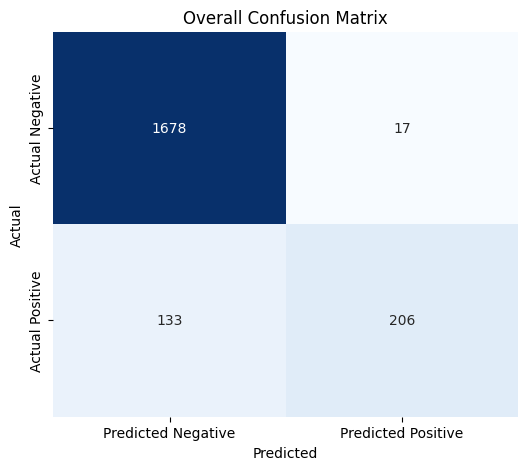

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume you have class names (modify based on your specific case)
class_names = ['Alternaria', 'Dieback', 'Healthy','Leaf_Blight','Leaf_Miners','Leaf_Miners_Powdery_Mildew','Powdery_Mildew']

# Generate predictions
y_pred_proba = model.predict(X_test)  # Predict probabilities
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to class labels (binary)

# True labels
y_true = y_test

# Flatten the y_true and y_pred arrays to compute the overall confusion matrix
y_true_flat = y_true.flatten()
y_pred_flat = y_pred.flatten()

# Compute the overall confusion matrix
cm_overall = confusion_matrix(y_true_flat, y_pred_flat)

# Print the overall confusion matrix
print("Overall Confusion Matrix:\n", cm_overall)

# Plot the overall confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_overall, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Overall Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
